In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/kalimati.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

SN                    int64
Commodity            object
Date         datetime64[ns]
Unit                 object
Minimum               int64
Maximum               int64
Average             float64
dtype: object


In [4]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35,40,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26,32,29.0
2,2,Potato Red,2013-06-16,Kg,20,21,20.5
3,3,Potato White,2013-06-16,Kg,15,16,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28,30,29.0


In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64


In [6]:
df = df.drop_duplicates()

In [7]:
from statsmodels.tsa.stattools import kpss

stats, p, lags, critical_values = kpss(df['Average'], 'ct')


C:\Users\User\AppData\Local\Temp\ipykernel_10680\2970160179.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(df['Average'], 'ct')


In [8]:

print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 2.104502837466922
p-value: 0.01
num lags: 158
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [9]:
if p < 0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

Series is not stationary


In [10]:
df = df.sort_values(by=['Date', 'Commodity'])

# Set the Date as index
df.set_index('Date', inplace=True)

In [11]:
df['Average_diff'] = df['Average'].diff()

# Drop NaN values resulting from differencing
df_diff = df.dropna()

In [12]:
# Check stationarity again with KPSS test
stats, p, lags, critical_values = kpss(df_diff['Average_diff'], 'ct')
print('KPSS Statistic:', stats)
print('p-value:', p)
print('Critical Values:', critical_values)



KPSS Statistic: 0.0018234165904208752
p-value: 0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


C:\Users\User\AppData\Local\Temp\ipykernel_10680\806289154.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = kpss(df_diff['Average_diff'], 'ct')


In [13]:
if p < 0.05:
    print('Series is still not stationary. Applying second-order differencing...')
    df['Average_diff2'] = df['Average_diff'].diff()
    df_diff2 = df.dropna()
    stats, p, lags, critical_values = kpss(df_diff2['Average_diff2'], 'ct')
    print('KPSS Statistic:', stats)
    print('p-value:', p)
    print('Critical Values:', critical_values)

if p >= 0.05:
    print('Series is stationary after differencing.')

Series is stationary after differencing.


In [14]:
df.head(5)

,SN,Commodity,Unit,Minimum,Maximum,Average,Average_diff
Date,,,,,,,
2013-06-16,50,Apple(Jholey),Kg,100,120,110.0,NaN
2013-06-16,34,Asparagus,Kg,100,150,125.0,15.0
2013-06-16,47,Bamboo Shoot,Kg,50,60,55.0,-70.0
2013-06-16,51,Banana,Doz,70,80,75.0,20.0
2013-06-16,16,Bitter Gourd,Kg,14,16,15.0,-60.0


In [15]:
# Q1 = df[['Minimum', 'Maximum', 'Average']].quantile(0.25)
# Q3 = df[['Minimum', 'Maximum', 'Average']].quantile(0.75)
# IQR = Q3 - Q1

In [16]:
# outliers = ((df[['Minimum', 'Maximum', 'Average']] < (Q1 - 1.5 * IQR)) | (df[['Minimum', 'Maximum', 'Average']] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Remove outliers
# df_cleaned = df[~outliers]

In [17]:
# print("Data after cleaning:\n", df_cleaned)

Date Features

In [18]:
df_cleaned = df.copy()

In [19]:
df_cleaned.loc[:, 'Year'] = df_cleaned.index.year
df_cleaned.loc[:, 'Month'] = df_cleaned.index.month
df_cleaned.loc[:, 'Day'] = df_cleaned.index.day
df_cleaned.loc[:, 'DayOfWeek'] = df_cleaned.index.dayofweek

print(df_cleaned.head())

            SN      Commodity Unit  Minimum  Maximum  Average  Average_diff  \
Date                                                                          
2013-06-16  50  Apple(Jholey)   Kg      100      120    110.0           NaN   
2013-06-16  34      Asparagus   Kg      100      150    125.0          15.0   
2013-06-16  47   Bamboo Shoot   Kg       50       60     55.0         -70.0   
2013-06-16  51         Banana  Doz       70       80     75.0          20.0   
2013-06-16  16   Bitter Gourd   Kg       14       16     15.0         -60.0   

            Year  Month  Day  DayOfWeek  
Date                                     
2013-06-16  2013      6   16          6  
2013-06-16  2013      6   16          6  
2013-06-16  2013      6   16          6  
2013-06-16  2013      6   16          6  
2013-06-16  2013      6   16          6  


Price Differences

In [20]:
df_cleaned['Max_Min_Diff'] = df_cleaned['Maximum'] - df_cleaned['Minimum']
df_cleaned['Avg_Min_Diff'] = df_cleaned['Average'] - df_cleaned['Minimum']
df_cleaned['Max_Avg_Diff'] = df_cleaned['Maximum'] - df_cleaned['Average']

In [21]:
df_aggregated = df_cleaned.groupby(['Date', 'Commodity']).agg({
    'Minimum': 'mean',
    'Maximum': 'mean',
    'Average': 'mean',
    'Max_Min_Diff': 'mean',
    'Avg_Min_Diff': 'mean',
    'Max_Avg_Diff': 'mean'
}).reset_index()

In [22]:
df_aggregated['Date'] = pd.to_datetime(df_aggregated['Date'])
df_aggregated.set_index('Date', inplace=True)

print(df_aggregated.head(5))

                Commodity  Minimum  Maximum  Average  Max_Min_Diff  \
Date                                                                 
2013-06-16  Apple(Jholey)    100.0    120.0    110.0          20.0   
2013-06-16      Asparagus    100.0    150.0    125.0          50.0   
2013-06-16   Bamboo Shoot     50.0     60.0     55.0          10.0   
2013-06-16         Banana     70.0     80.0     75.0          10.0   
2013-06-16   Bitter Gourd     14.0     16.0     15.0           2.0   

            Avg_Min_Diff  Max_Avg_Diff  
Date                                    
2013-06-16          10.0          10.0  
2013-06-16          25.0          25.0  
2013-06-16           5.0           5.0  
2013-06-16           5.0           5.0  
2013-06-16           1.0           1.0  


In [23]:
# Function to handle frequency and missing dates for each commodity
def handle_frequency(df, commodity):
    df_commodity = df[df['Commodity'] == commodity].drop(columns=['Commodity'])
    df_commodity = df_commodity.asfreq('D')  # Set frequency to daily
    df_commodity['Commodity'] = commodity  # Add the commodity column back
    return df_commodity

# Get unique commodities
commodities = df_aggregated['Commodity'].unique()

# Create a list to hold DataFrames
df_list = []

# Process each commodity separately
for commodity in commodities:
    df_commodity = handle_frequency(df_aggregated, commodity)
    df_list.append(df_commodity)

# Concatenate all commodity DataFrames back into one DataFrame
df_final = pd.concat(df_list)

print(df_final.head(5))


            Minimum  Maximum  Average  Max_Min_Diff  Avg_Min_Diff  \
Date                                                                
2013-06-16    100.0    120.0    110.0          20.0          10.0   
2013-06-17    110.0    130.0    120.0          20.0          10.0   
2013-06-18    110.0    120.0    115.0          10.0           5.0   
2013-06-19    110.0    120.0    115.0          10.0           5.0   
2013-06-20    110.0    120.0    115.0          10.0           5.0   

            Max_Avg_Diff      Commodity  
Date                                     
2013-06-16          10.0  Apple(Jholey)  
2013-06-17          10.0  Apple(Jholey)  
2013-06-18           5.0  Apple(Jholey)  
2013-06-19           5.0  Apple(Jholey)  
2013-06-20           5.0  Apple(Jholey)  


Lag Features

In [24]:
# Create lag features for 'Average' price for each commodity
for commodity in commodities:
    df_final.loc[df_final['Commodity'] == commodity, 'Lag_1'] = df_final[df_final['Commodity'] == commodity]['Average'].shift(1)
    df_final.loc[df_final['Commodity'] == commodity, 'Lag_2'] = df_final[df_final['Commodity'] == commodity]['Average'].shift(2)
    df_final.loc[df_final['Commodity'] == commodity, 'Lag_3'] = df_final[df_final['Commodity'] == commodity]['Average'].shift(3)

print(df_final.head(5))


            Minimum  Maximum  Average  Max_Min_Diff  Avg_Min_Diff  \
Date                                                                
2013-06-16    100.0    120.0    110.0          20.0          10.0   
2013-06-17    110.0    130.0    120.0          20.0          10.0   
2013-06-18    110.0    120.0    115.0          10.0           5.0   
2013-06-19    110.0    120.0    115.0          10.0           5.0   
2013-06-20    110.0    120.0    115.0          10.0           5.0   

            Max_Avg_Diff      Commodity  Lag_1  Lag_2  Lag_3  
Date                                                          
2013-06-16          10.0  Apple(Jholey)    NaN    NaN    NaN  
2013-06-17          10.0  Apple(Jholey)  110.0    NaN    NaN  
2013-06-18           5.0  Apple(Jholey)  120.0  110.0    NaN  
2013-06-19           5.0  Apple(Jholey)  115.0  120.0  110.0  
2013-06-20           5.0  Apple(Jholey)  115.0  115.0  120.0  


In [25]:
# Calculate rolling statistics for 'Average' price for each commodity
for commodity in commodities:
    df_final.loc[df_final['Commodity'] == commodity, 'Rolling_Mean_7'] = df_final[df_final['Commodity'] == commodity]['Average'].rolling(window=7).mean()
    df_final.loc[df_final['Commodity'] == commodity, 'Rolling_Std_7'] = df_final[df_final['Commodity'] == commodity]['Average'].rolling(window=7).std()

print(df_final.head(5))


            Minimum  Maximum  Average  Max_Min_Diff  Avg_Min_Diff  \
Date                                                                
2013-06-16    100.0    120.0    110.0          20.0          10.0   
2013-06-17    110.0    130.0    120.0          20.0          10.0   
2013-06-18    110.0    120.0    115.0          10.0           5.0   
2013-06-19    110.0    120.0    115.0          10.0           5.0   
2013-06-20    110.0    120.0    115.0          10.0           5.0   

            Max_Avg_Diff      Commodity  Lag_1  Lag_2  Lag_3  Rolling_Mean_7  \
Date                                                                           
2013-06-16          10.0  Apple(Jholey)    NaN    NaN    NaN             NaN   
2013-06-17          10.0  Apple(Jholey)  110.0    NaN    NaN             NaN   
2013-06-18           5.0  Apple(Jholey)  120.0  110.0    NaN             NaN   
2013-06-19           5.0  Apple(Jholey)  115.0  120.0  110.0             NaN   
2013-06-20           5.0  Apple(Jhol

In [26]:
df_final = df_final.dropna()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for scaling
numeric_cols = df_final.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_final[numeric_cols]), columns=numeric_cols, index=df_final.index)

# Combine scaled numeric data with the non-numeric data
df_scaled = pd.concat([df_scaled_numeric, df_final.drop(columns=numeric_cols)], axis=1)

# Print the first few rows to verify
print(df_scaled.head(5))


             Minimum   Maximum   Average  Max_Min_Diff  Avg_Min_Diff  \
Date                                                                   
2013-10-12  0.089027  0.089692  0.088435      0.018215      0.018215   
2013-10-13  0.089027  0.089692  0.088435      0.018215      0.018215   
2013-10-14  0.089027  0.089692  0.088435      0.018215      0.018215   
2013-10-15  0.082126  0.089692  0.085034      0.036430      0.036430   
2013-10-16  0.089027  0.089692  0.088435      0.018215      0.018215   

            Max_Avg_Diff     Lag_1     Lag_2     Lag_3  Rolling_Mean_7  \
Date                                                                     
2013-10-12      0.018215  0.088435  0.071429  0.074830        0.081411   
2013-10-13      0.018215  0.088435  0.088435  0.071429        0.083430   
2013-10-14      0.018215  0.088435  0.088435  0.088435        0.085449   
2013-10-15      0.036430  0.088435  0.088435  0.088435        0.085954   
2013-10-16      0.018215  0.085034  0.088435  0.088

Time Series Plot

In [28]:
# import matplotlib.pyplot as plt

# # Plot the time series of the 'Average' price for each commodity
# commodities = df_final['Commodity'].unique()

# for commodity in commodities:
#     df_commodity = df_final[df_final['Commodity'] == commodity]
#     plt.figure(figsize=(12, 6))
#     plt.plot(df_commodity.index, df_commodity['Average'], label=f'Average Price - {commodity}', color='blue')
#     plt.xlabel('Date')
#     plt.ylabel('Average Price')
#     plt.title(f'Average Price Over Time - {commodity}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()



In [29]:
print(df_final.columns)


Index(['Minimum', 'Maximum', 'Average', 'Max_Min_Diff', 'Avg_Min_Diff',
       'Max_Avg_Diff', 'Commodity', 'Lag_1', 'Lag_2', 'Lag_3',
       'Rolling_Mean_7', 'Rolling_Std_7'],
      dtype='object')


In [38]:
# Split the data
train = df_final.loc[df_final.index < "2019-01-01"]
val = df_final.loc[(df_final.index >= "2019-01-01") & (df_final.index < "2019-04-01")]

print(f"Train shape: {train.shape}")
print(f"Validation shape: {val.shape}")

Train shape: (94857, 12)
Validation shape: (5292, 12)


In [39]:
target_col = 'Average' 
X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_val = val.drop(columns=[target_col])
y_val = val[target_col]

y_train.shape, X_train.shape, y_val.shape, X_val.shape

((94857,), (94857, 11), (5292,), (5292, 11))

In [32]:
train.head(5)

,Minimum,Maximum,Average,Max_Min_Diff,Avg_Min_Diff,Max_Avg_Diff,Commodity,Lag_1,Lag_2,Lag_3,Rolling_Mean_7,Rolling_Std_7
Date,,,,,,,,,,,,
2013-10-12,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,110.0,115.0,121.428571,10.293317
2013-10-13,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,135.0,110.0,124.285714,10.965313
2013-10-14,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,135.0,135.0,127.142857,10.745985
2013-10-15,120.0,140.0,130.0,20.0,10.0,10.0,Apple(Jholey),135.0,135.0,135.0,127.857143,10.745985
2013-10-16,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),130.0,135.0,135.0,130.714286,9.322272


In [33]:
# light bgm model
import lightgbm as lgb
import shap
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMRegressor

In [34]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)

In [35]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

# Calculating SMAPE for LightGBM output:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return "SMAPE", smape_val, False

In [36]:
df_final.head(5)

,Minimum,Maximum,Average,Max_Min_Diff,Avg_Min_Diff,Max_Avg_Diff,Commodity,Lag_1,Lag_2,Lag_3,Rolling_Mean_7,Rolling_Std_7
Date,,,,,,,,,,,,
2013-10-12,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,110.0,115.0,121.428571,10.293317
2013-10-13,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,135.0,110.0,124.285714,10.965313
2013-10-14,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),135.0,135.0,135.0,127.142857,10.745985
2013-10-15,120.0,140.0,130.0,20.0,10.0,10.0,Apple(Jholey),135.0,135.0,135.0,127.857143,10.745985
2013-10-16,130.0,140.0,135.0,10.0,5.0,5.0,Apple(Jholey),130.0,135.0,135.0,130.714286,9.322272


In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Commodity' column
le = LabelEncoder()
df_final['Commodity'] = le.fit_transform(df_final['Commodity'])

# Prepare your training and validation data
X_train = train.drop(columns=['Average'])  # Drop target variable from features
y_train = train['Average']

X_val = val.drop(columns=['Average'])
y_val = val['Average']


In [40]:
df_final.tail(5)

,Minimum,Maximum,Average,Max_Min_Diff,Avg_Min_Diff,Max_Avg_Diff,Commodity,Lag_1,Lag_2,Lag_3,Rolling_Mean_7,Rolling_Std_7
Date,,,,,,,,,,,,
2021-05-09,120.0,130.0,125.0,10.0,5.0,5.0,69,130.0,125.0,125.0,126.428571,2.439750
2021-05-10,140.0,150.0,145.0,10.0,5.0,5.0,69,125.0,130.0,125.0,128.571429,7.480132
2021-05-11,140.0,150.0,145.0,10.0,5.0,5.0,69,145.0,125.0,130.0,131.428571,9.449112
2021-05-12,140.0,150.0,145.0,10.0,5.0,5.0,69,145.0,145.0,125.0,134.285714,10.177005
2021-05-13,140.0,150.0,145.0,10.0,5.0,5.0,69,145.0,145.0,145.0,137.142857,9.940298


In [38]:
# lgbm in without any parameters
first_model = lgb.LGBMRegressor().fit(X_train, y_train)

print("TRAIN SMAPE:", smape(y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:", mean_absolute_error(y_train, pred))
print("RMSE:", mean_squared_error(y_train, pred))
print("R2 Score:", r2_score(y_train, pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 94857, number of used features: 11
[LightGBM] [Info] Start training from score 84.962791
TRAIN SMAPE: 0.07713704611754998
VALID SMAPE: 0.07505150299870464
MAE: 0.08980624911950752
RMSE: 9.431985121397226
R2 Score: 0.998367335714657


In [41]:
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math

In [42]:
# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled = sc.fit_transform(train['Average'].values.reshape(-1, 1))
val_scaled = sc.transform(val['Average'].values.reshape(-1, 1))

In [43]:
# Creating training data with 60 timesteps
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [50]:
# LSTM Model
from keras.models import Sequential
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


c:\Users\User\OneDrive\Desktop\Market-Demand-Prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 225s 74ms/step - loss: 5.7695e-04
Epoch 2/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 239s 80ms/step - loss: 2.5713e-04
Epoch 3/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 291s 98ms/step - loss: 2.2752e-04
Epoch 4/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 313s 106ms/step - loss: 2.2167e-04
Epoch 5/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 245s 83ms/step - loss: 2.1106e-04
Epoch 6/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 250s 84ms/step - loss: 1.9807e-04
Epoch 7/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 214s 72ms/step - loss: 2.0903e-04
Epoch 8/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 236s 80ms/step - loss: 1.8272e-04
Epoch 9/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 221s 75ms/step - loss: 1.6909e-04
Epoch 10/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 228s 77ms/step - loss: 1.6672e-04
Epoch 11/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 209s 71ms/step - loss: 1.6352e-04
Epoch 12/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 206s 69ms/step - loss: 1.5855e-04
Epoch 13/50
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 205s 69ms/step - loss: 1.5489e-04
Epoch 1

In [51]:
# Preparing validation data
dataset_total = pd.concat((train['Average'], val['Average']), axis=0)
inputs = dataset_total[len(dataset_total) - len(val) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_val = []
for i in range(60, len(inputs)):
    X_val.append(inputs[i-60:i, 0])

X_val = np.array(X_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Predicting prices
predicted_price = model.predict(X_val)
predicted_price = sc.inverse_transform(predicted_price)




166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


In [52]:
def plot_predictions(test, predicted, title="Commodity Price Prediction"):
    plt.plot(test, color='red', label='Real Price')
    plt.plot(predicted, color='blue', label='Predicted Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print(f"The root mean squared error is {rmse:.4f}.")

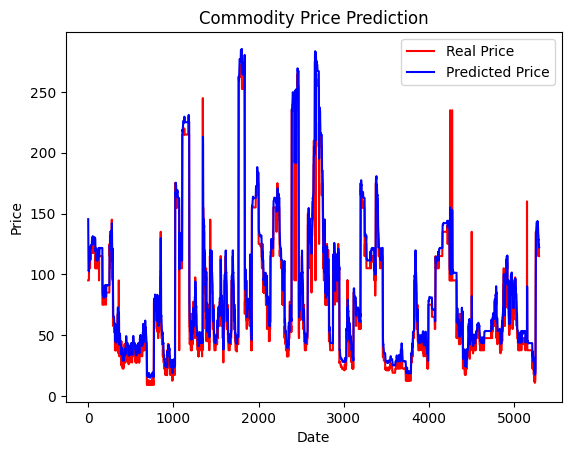

The root mean squared error is 15.0809.


In [53]:
# Visualizing the results
plot_predictions(val['Average'].values, predicted_price)
return_rmse(val['Average'].values, predicted_price)

In [ ]:
''

#